In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [225]:
data_X = pd.read_csv("IRISFeat.csv",header = None) .values
data_y = pd.read_csv("IRISlabel.csv",header = None).values
# Preview the first 5 lines of the loaded data 

In [226]:
def get_next_train_valid(X_shuffled, y_shuffled, k, itr = 0):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    X_valid = X_shuffled[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k,:]
    Y_valid = y_shuffled[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k]
    X_train = np.delete(X_shuffled, np.s_[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k:1], 0)
    Y_train = np.delete(y_shuffled, np.s_[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k:1], 0)
    
    
    return  X_train, Y_train, X_valid, Y_valid

In [316]:
def train(X_train, Y_train, learning_rate, max_itr):
    X_train_pading = np.concatenate((X_train, np.ones((len(X_train),1))), axis=1)
    
    W = np.ones(X_train_pading.shape[1])


    for i in range(max_itr):
        
            for m in range(len(X_train_pading)):
        
        
                W = W + learning_rate* (Y_train[m] - 1/(1+np.exp(-  W.T @ X_train_pading[m])  )) * X_train_pading[m]
            
    return W
    
    

In [371]:
samples = np.concatenate((data_X, data_y), axis=1)

#print(samples)
np.random.shuffle(samples)
    
    #X
X_shuffled = samples[:,:-1]
#y_shuffled = samples[:,-1]*2-1
y_shuffled = samples[:,-1]


X_train, Y_train, X_valid, Y_valid = get_next_train_valid(X_shuffled, y_shuffled, 5)

#print(X_train,Y_train)

X_train_pading = np.concatenate((X_train, np.ones((len(X_train),1))), axis=1)



#print(X_train_pading[1]) 


    

In [372]:
#print(X_train_pading) 
a = np.array([1,2,3])
b = np.array([1,2,3])

In [388]:
W_0 = np.ones(X_train_pading.shape[1])

learning_rate = 0.5


for i in range(2*10**3):
        
        
    for m in range(len(X_train_pading)):
        
        
        W_0 = W_0 + learning_rate* (Y_train[m] - 1/(1+np.exp(-  W_0.T @ X_train_pading[m])  )) * X_train_pading[m]

In [389]:
#Y_train * 1/(1+np.exp(- X_train_pading @ W_0))

In [390]:
#X_train_pading

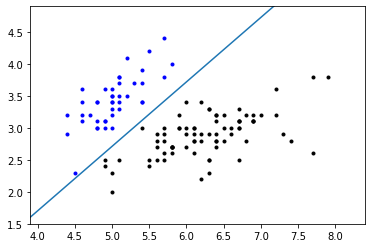

In [391]:
for i in range(len(X_train_pading)):
    if (Y_train[i] == 1):
        plt.plot(X_train_pading[i,0], X_train_pading[i,1] , '.k')
    else:
        plt.plot(X_train_pading[i,0], X_train_pading[i,1] , '.b')

x = np.arange(3.0, 9.0, 0.05)
y = -(W_0[0]/W_0[1]*x)-(W_0[2]/W_0[1])

plt.xlim(np.min(X_train_pading[:,0])-0.5, np.max(X_train_pading[:,0])+0.5) 
plt.ylim(np.min(X_train_pading[:,1])-0.5, np.max(X_train_pading[:,1])+0.5) 
plt.plot(x, y , '-')

In [392]:
W_0

array([ 43.20624478, -42.86467345, -99.82837956])

In [393]:
X_train_pading[m]

array([4.7, 3.2, 1. ])

In [257]:
#plt.plot(range(len(Objective)), Objective)

W_0.T @ X_train_pading[m]

-22.812460572627543